### yolov5模型导出ONNX

#### 1 工作机制

在本项目中，我们将使用tensort decode plugin来代替原来yolov5代码中的decode操作，如果不替换，这部分运算将影响整体性能。

为了让tensorrt能够识别并加载我们额外添加的plugin operator，我们需要修改Yolov5代码中导出onnx模型的部分。

onnx是一种开放的模型格式，可以用来表示深度学习模型，它是由微软开发的，目前已经成为了深度学习模型的标准格式。可以简单理解为各种框架模型转换的一种桥梁。
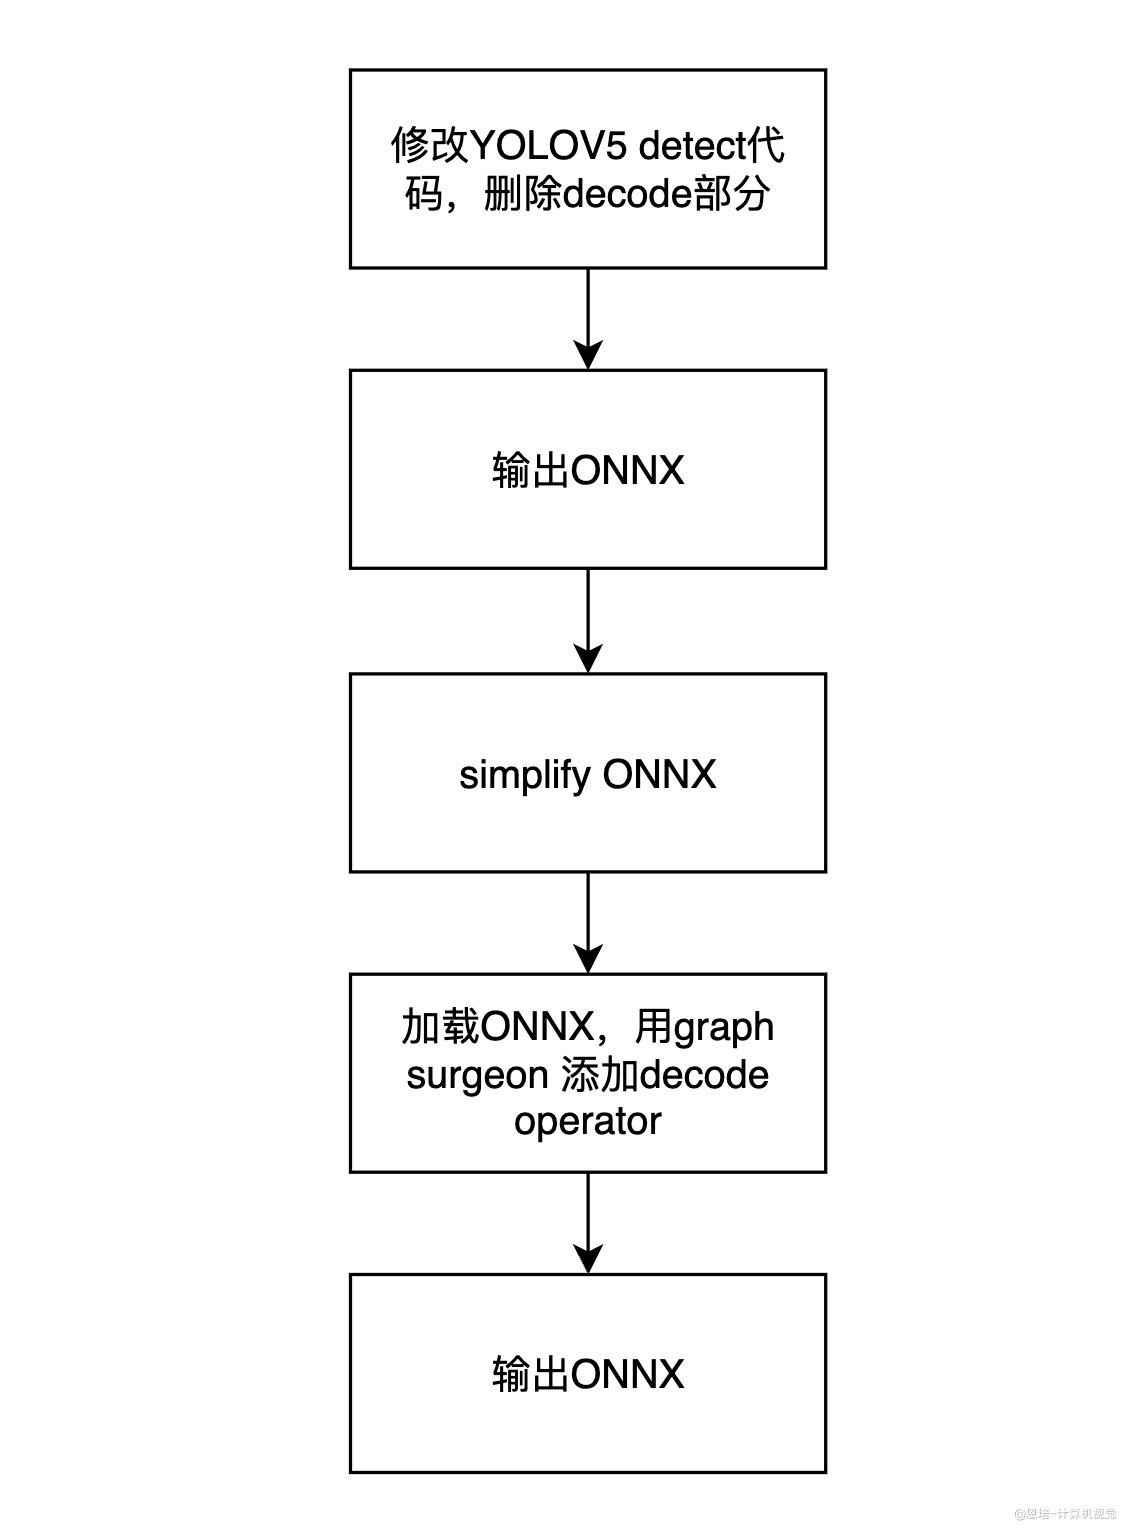

#### 2. 修改yolov5 代码，输出ONNX

修改之前，建议先使用python export.py --weights weights/yolov5s.pt --include onnx --simplify --dynamic导出一份原始操作的onnx模型，以便和修改后的模型进行对比。

使用课程附件提供的git patch批量修改代码，

代码位置：1.代码/export.patch

`
#将patch复制到yolov5文件夹
cp export.patch yolov5/
#进入yolov5文件夹
cd yolov5/
#应用patch
git am export.patch
`


#### make sure the following packages are installed
`
pip install seaborn
pip install onnx-graphsurgeon
pip install onnx-simplifier==0.3.10
apt update
apt install -y libgl1-mesa-glx
`


#### First time to use git, needs config email:  git config --global user.email "hardwarediy@gmail.com"

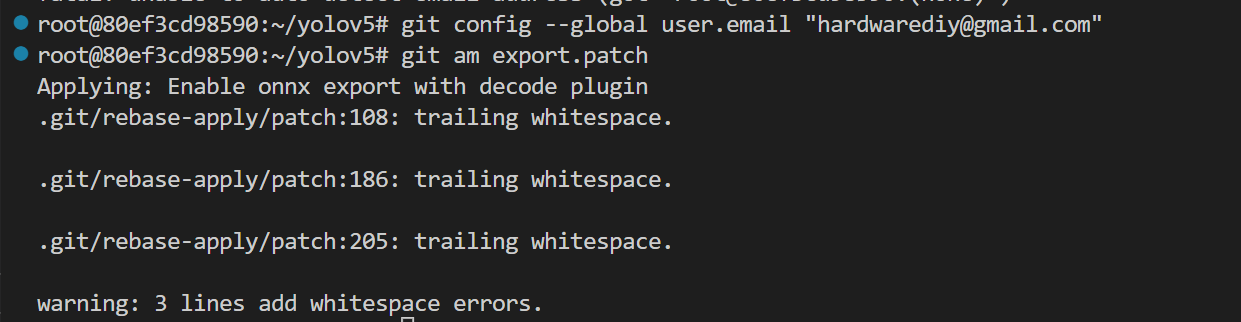

#### export to onnx
`python export.py --weights weights/yolov5s.pt --include onnx --simplify --dynamic`
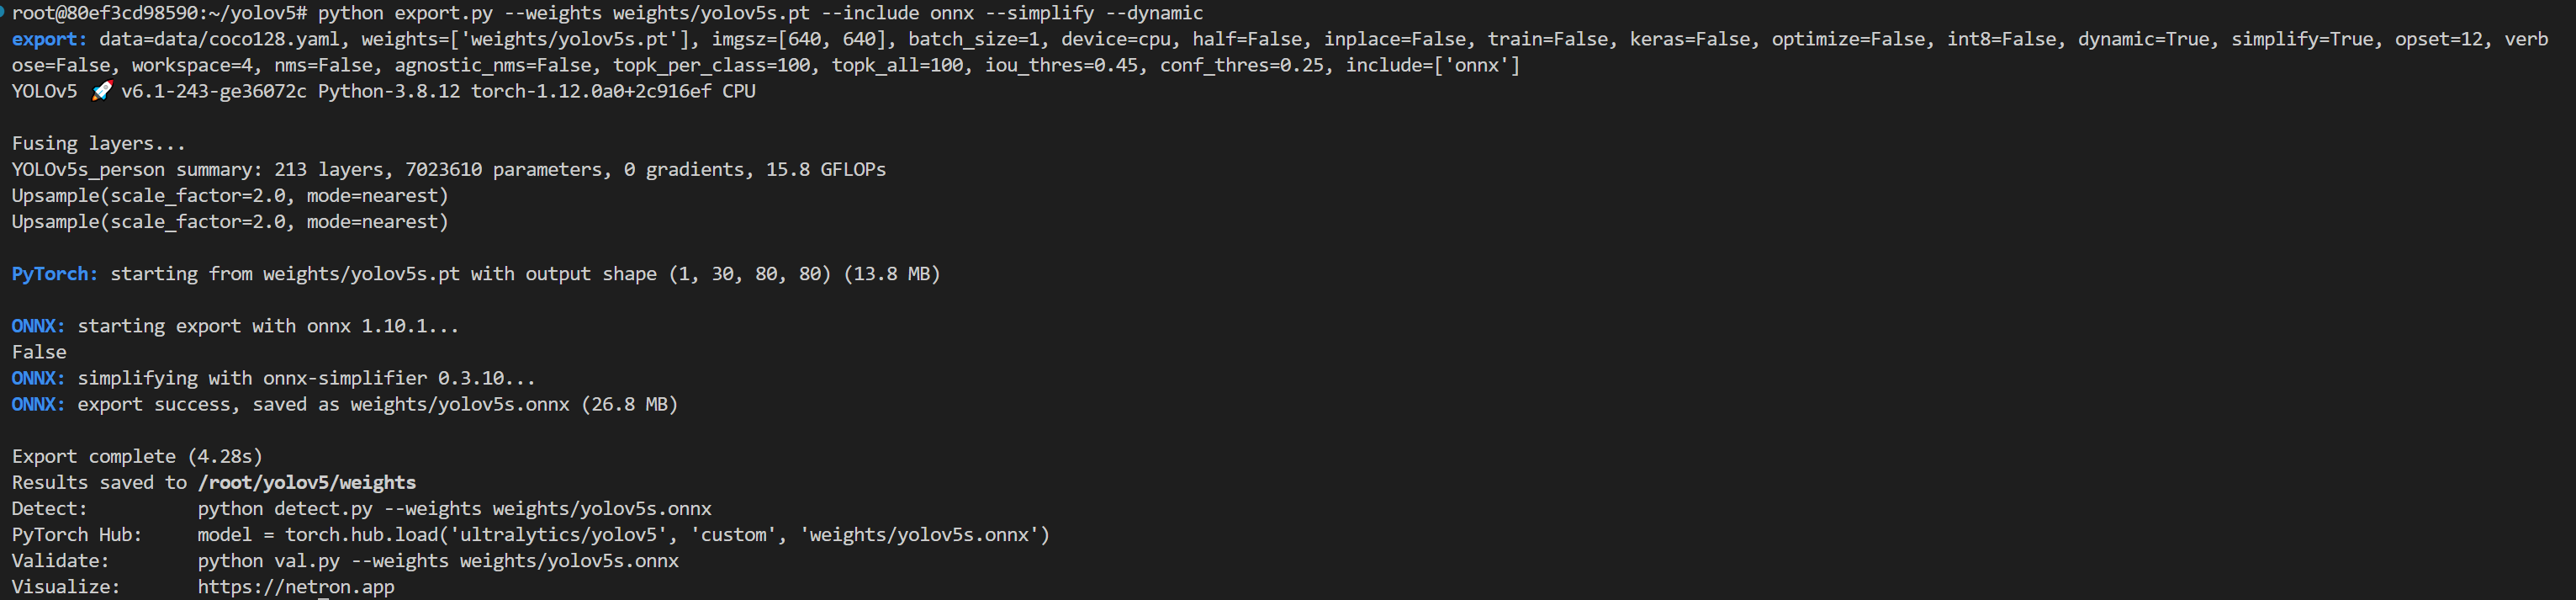

#### install visualization tool
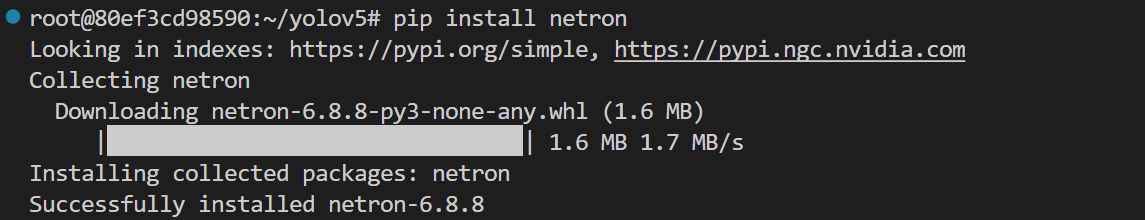


### View Onnx Online

- open view - Command Pellete
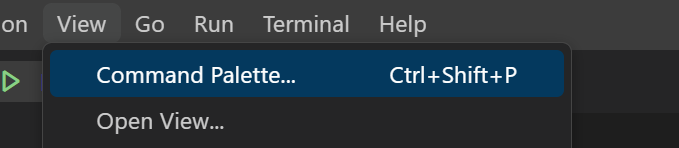

- Type "open Link" to bring open link window
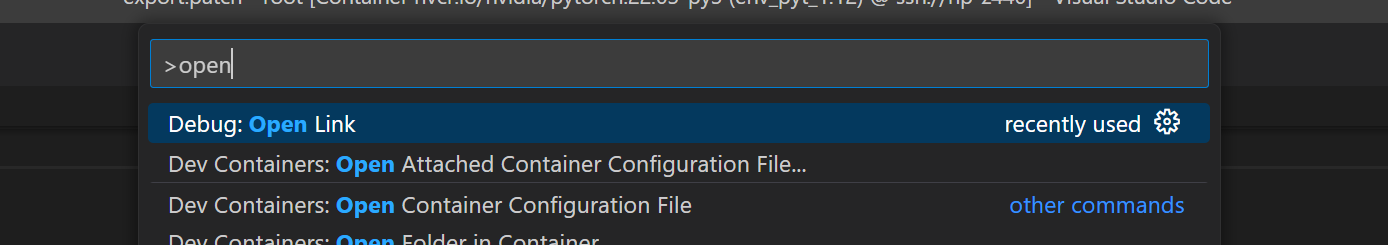

- type the url from Netron: http://localhost:8080
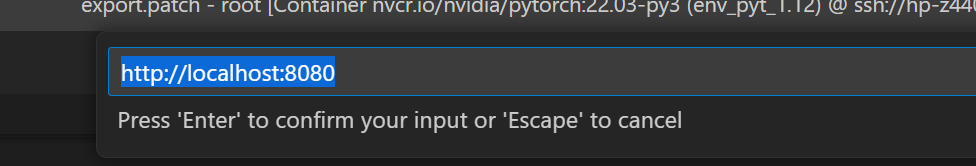

- a debug browser shows up with the model structures
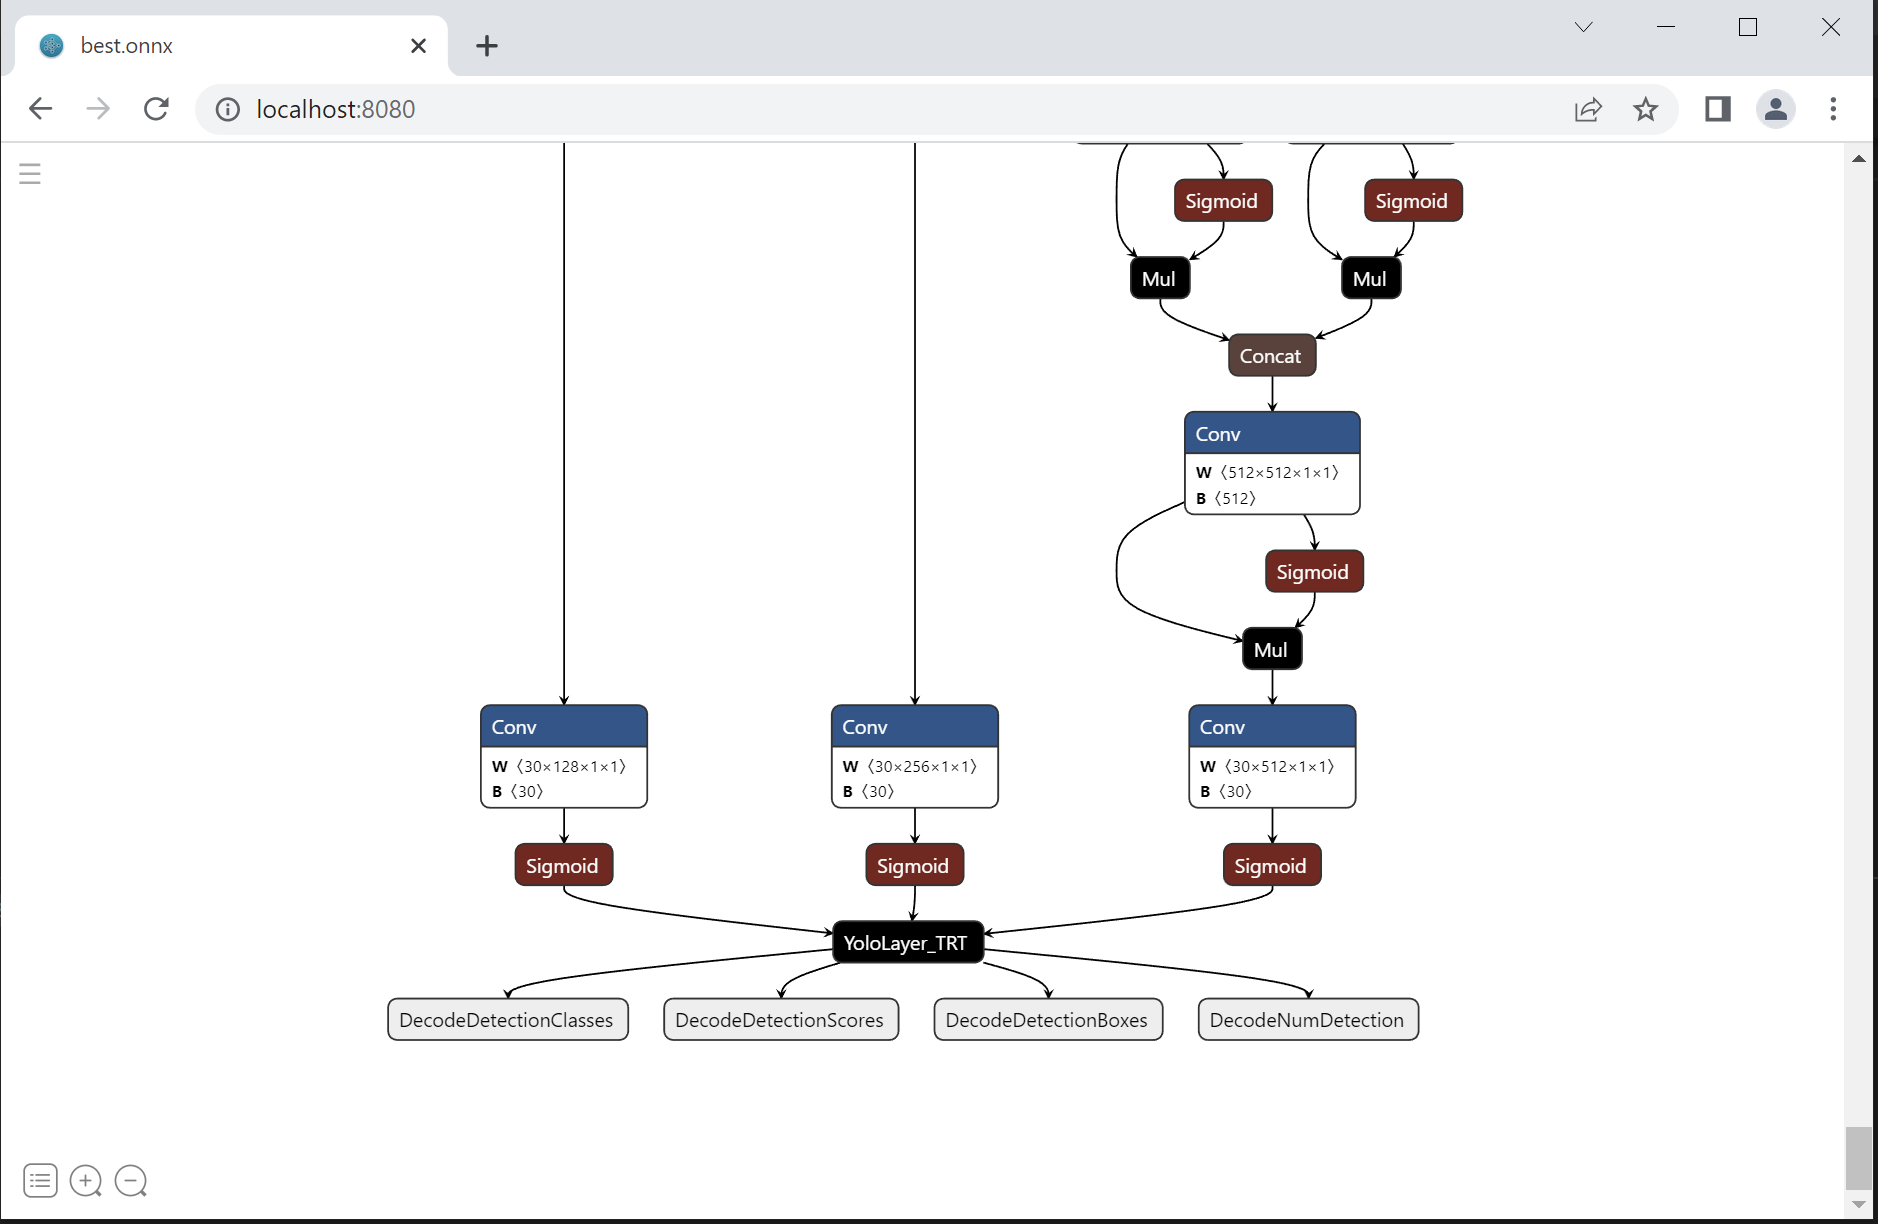

### 3. Deploy TensorRT
use Tensorrt docker container: **Make sure to use root VSCode window, not the env_pyt_1.12 app window**

`docker run --gpus all -it --name env_trt -v $(pwd):/app nvcr.io/nvidia/tensorrt:22.08-py3`

since there is no image in local, it will download image to local, it will take a while to complete
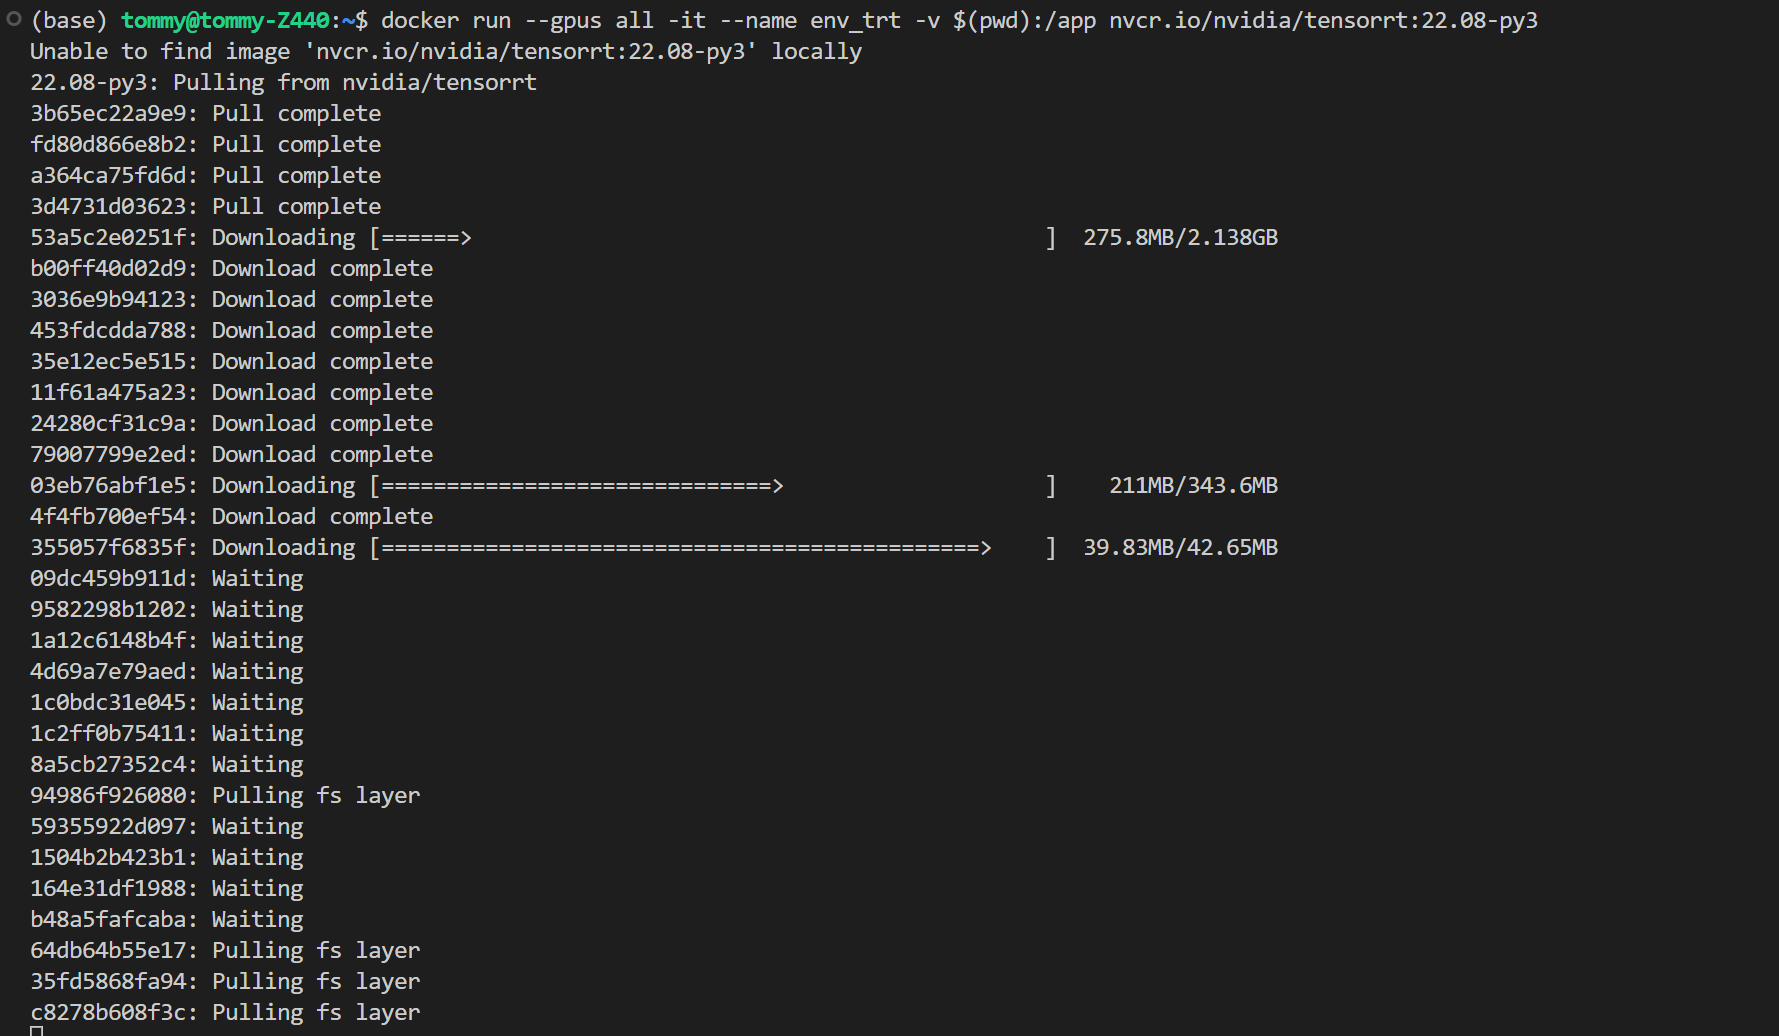



### OpenCV is missing in Tensorrt Docker package
- **Found Error when compile tensorrt build with `cmake -S . -B build` in "tensorrt_cpp".**
    - `TensorRT version: 8.4.2
-- Found TensorRT: /usr/include/x86_64-linux-gnu  
Found TensorRT: /usr/include/x86_64-linux-gnu /usr/lib/x86_64-linux-gnu/libnvinfer.so;/usr/lib/x86_64-linux-gnu/libnvinfer_plugin.so;/usr/lib/x86_64-linux-gnu/libnvparsers.so;/usr/lib/x86_64-linux-gnu/libnvonnxparser.so /usr/src/tensorrt/samples
TensorRT version: 8.4.2
CMake Error at CMakeLists.txt:9 (find_package):
  By not providing "FindOpenCV.cmake" in CMAKE_MODULE_PATH this project has
  asked CMake to find a package configuration file provided by "OpenCV", but
  CMake did not find one.

  Could not find a package configuration file provided by "OpenCV" with any
  of the following names:

    OpenCVConfig.cmake
    opencv-config.cmake

  Add the installation prefix of "OpenCV" to CMAKE_PREFIX_PATH or set
  "OpenCV_DIR" to a directory containing one of the above files.  If "OpenCV"
  provides a separate development package or SDK, be sure it has been
  installed.
  `

- **Install OpenCV Package from scratch**
    - `docker run --gpus all -it --name env_trt -v $(pwd):/app nvcr.io/nvidia/tensorrt:22.08-py3`
    - `apt-get update`
    - Install the required packages for building OpenCV: `apt-get install -y build-essential cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev`
    - Clone the OpenCV repository: `git clone https://github.com/opencv/opencv.git`
    - Create a build directory and navigate into it: 
    <br>`cd opencv
mkdir build
cd build
`
    - Configure the OpenCV build using CMake:`cmake ..`
    - Build OpenCV: `make -j$(nproc)`
    - Install OpenCV: `make install`
    
    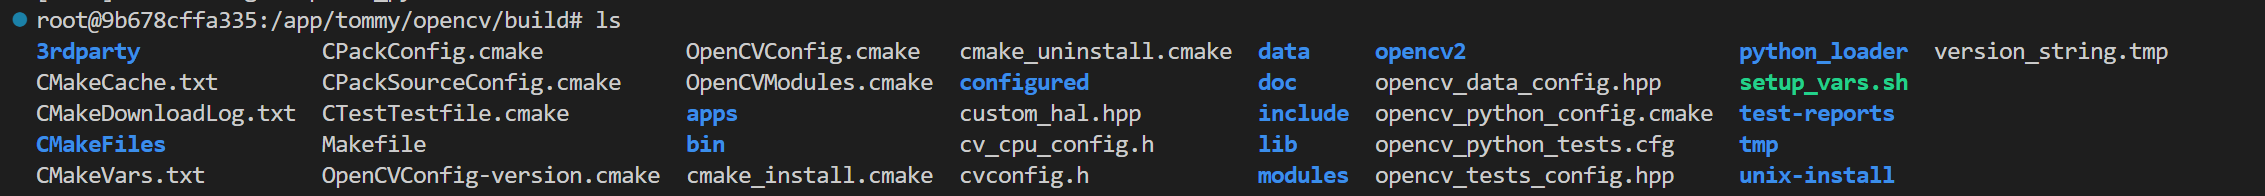
    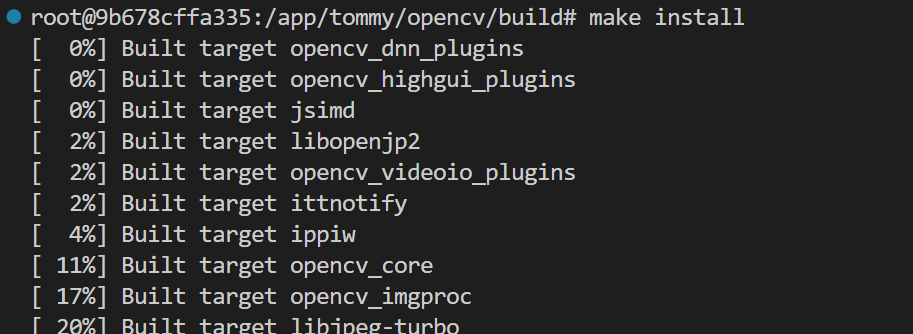

- Tensorrt Build works now
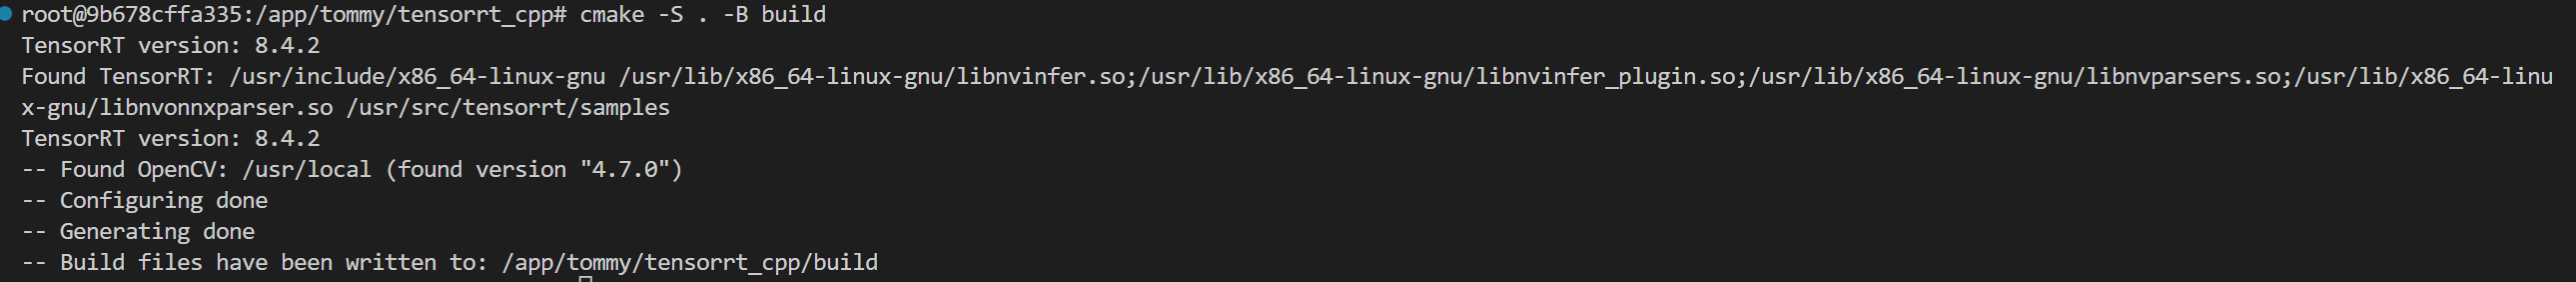

- `cmake --build build`
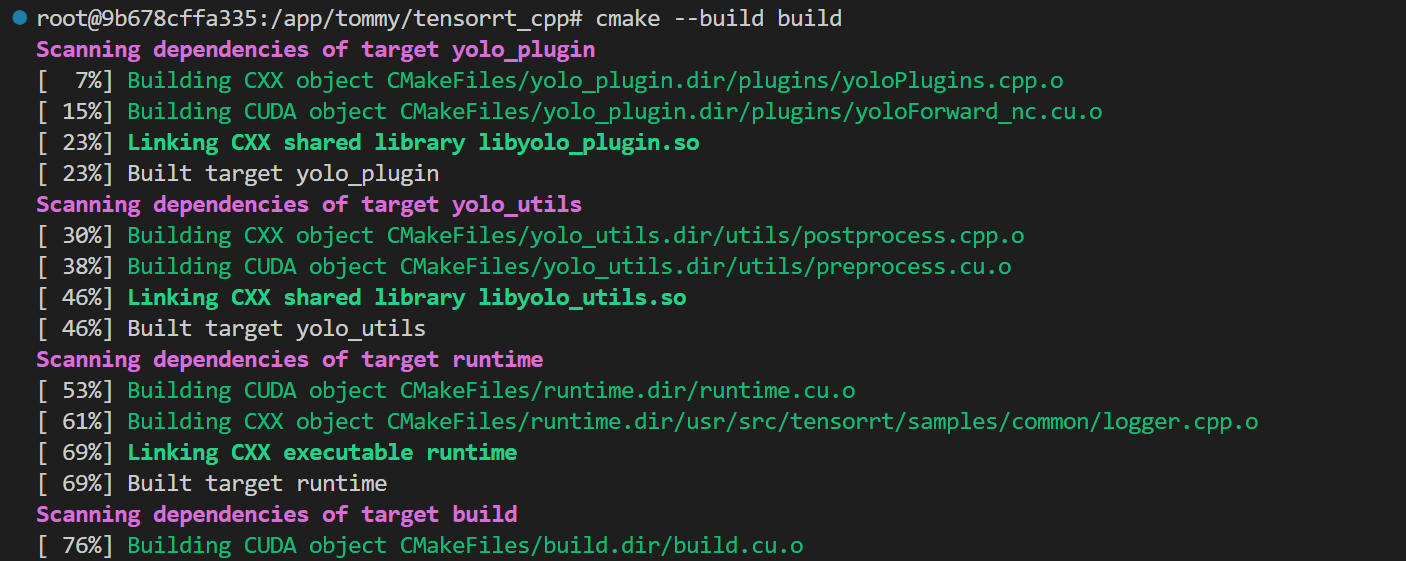

- **build the engine file**  `./build/build ./weights/best.onnx`

since this will check FP16, it will take a while to finish it

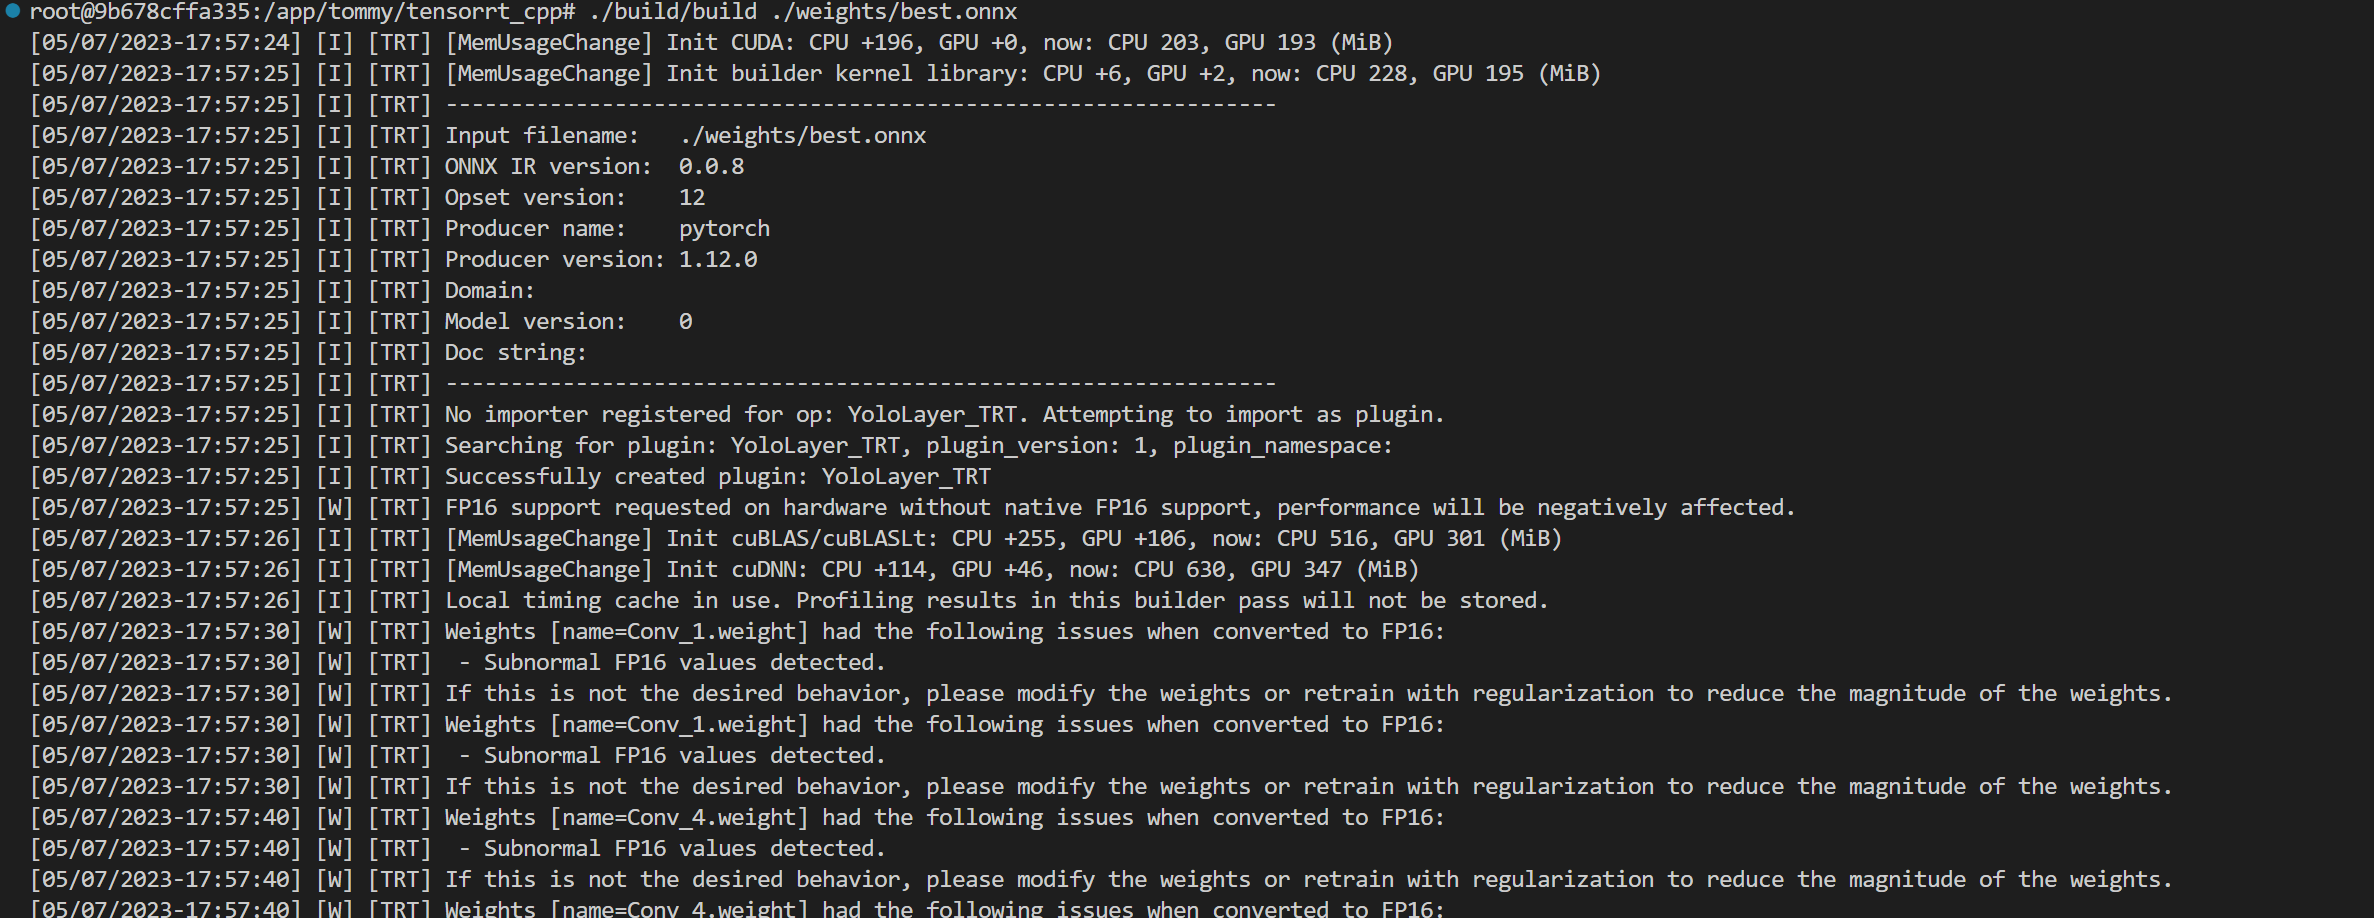

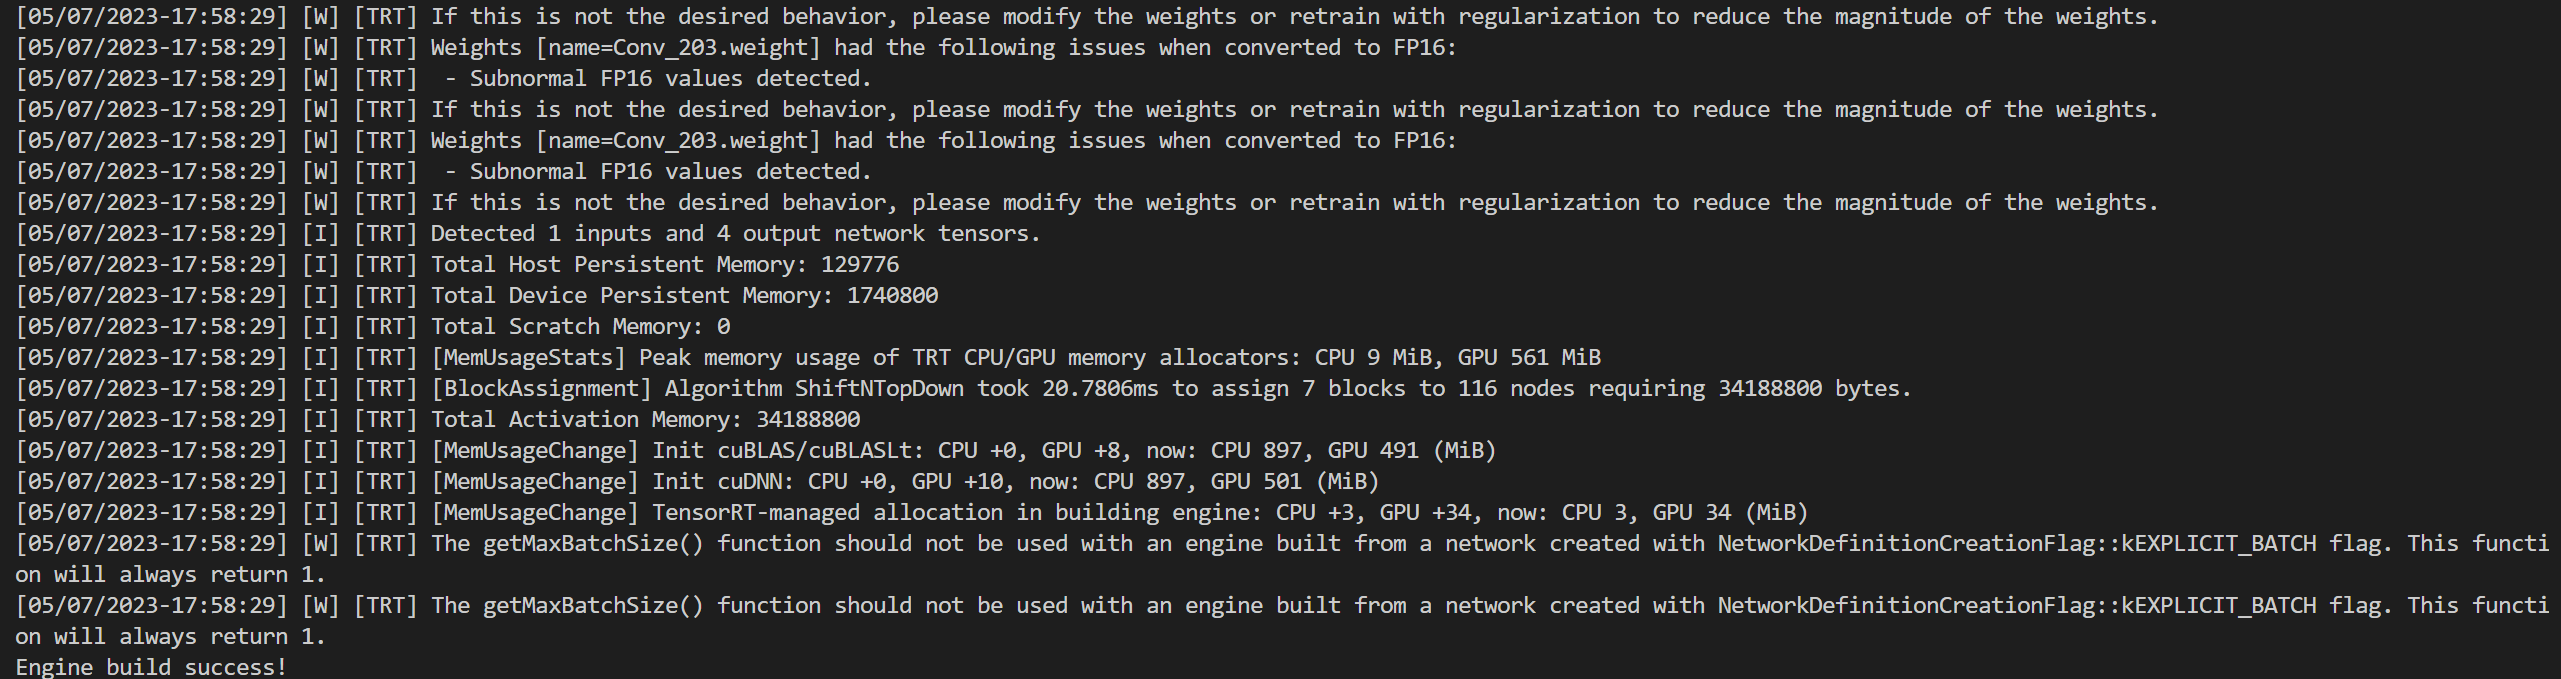

- yolov5.engine file is created
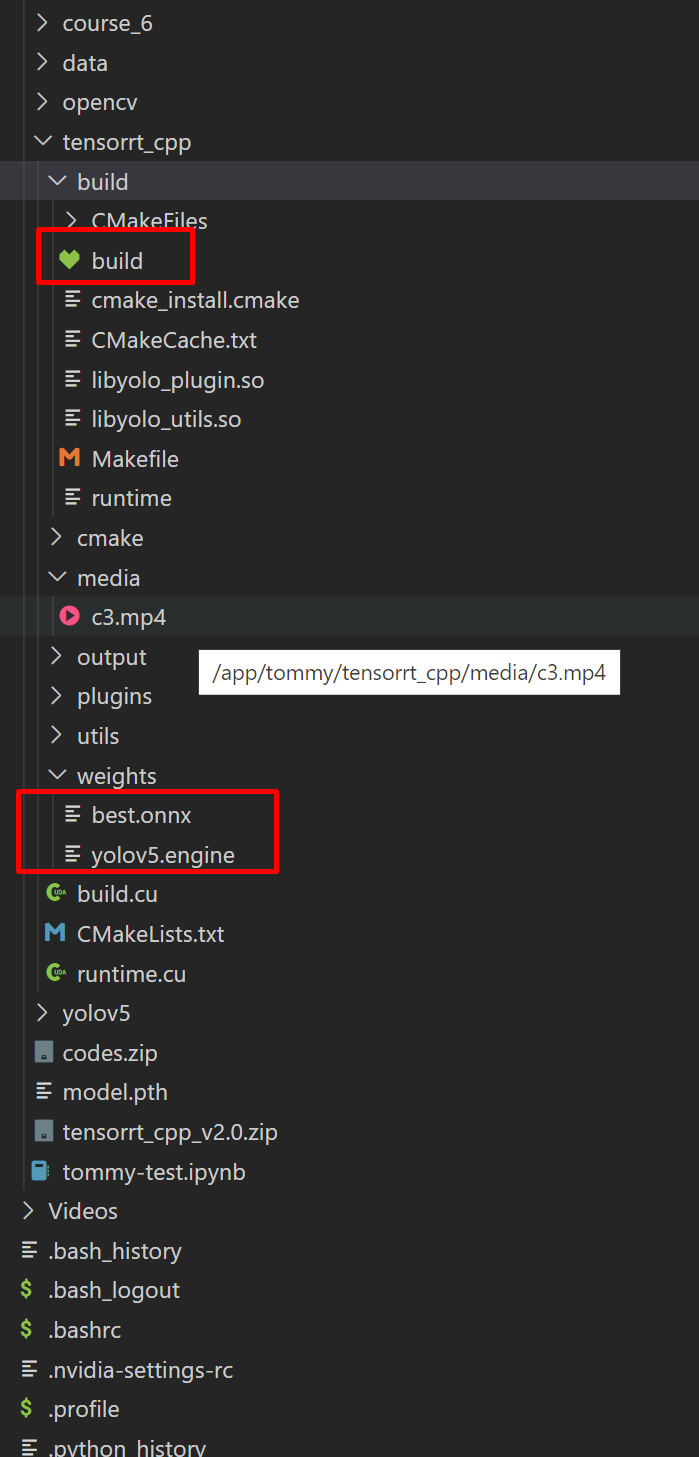

- **Use runtime to process the sample c3 video.**

`./build/runtime ./weights/yolov5.engine ./media/c3.mp4`

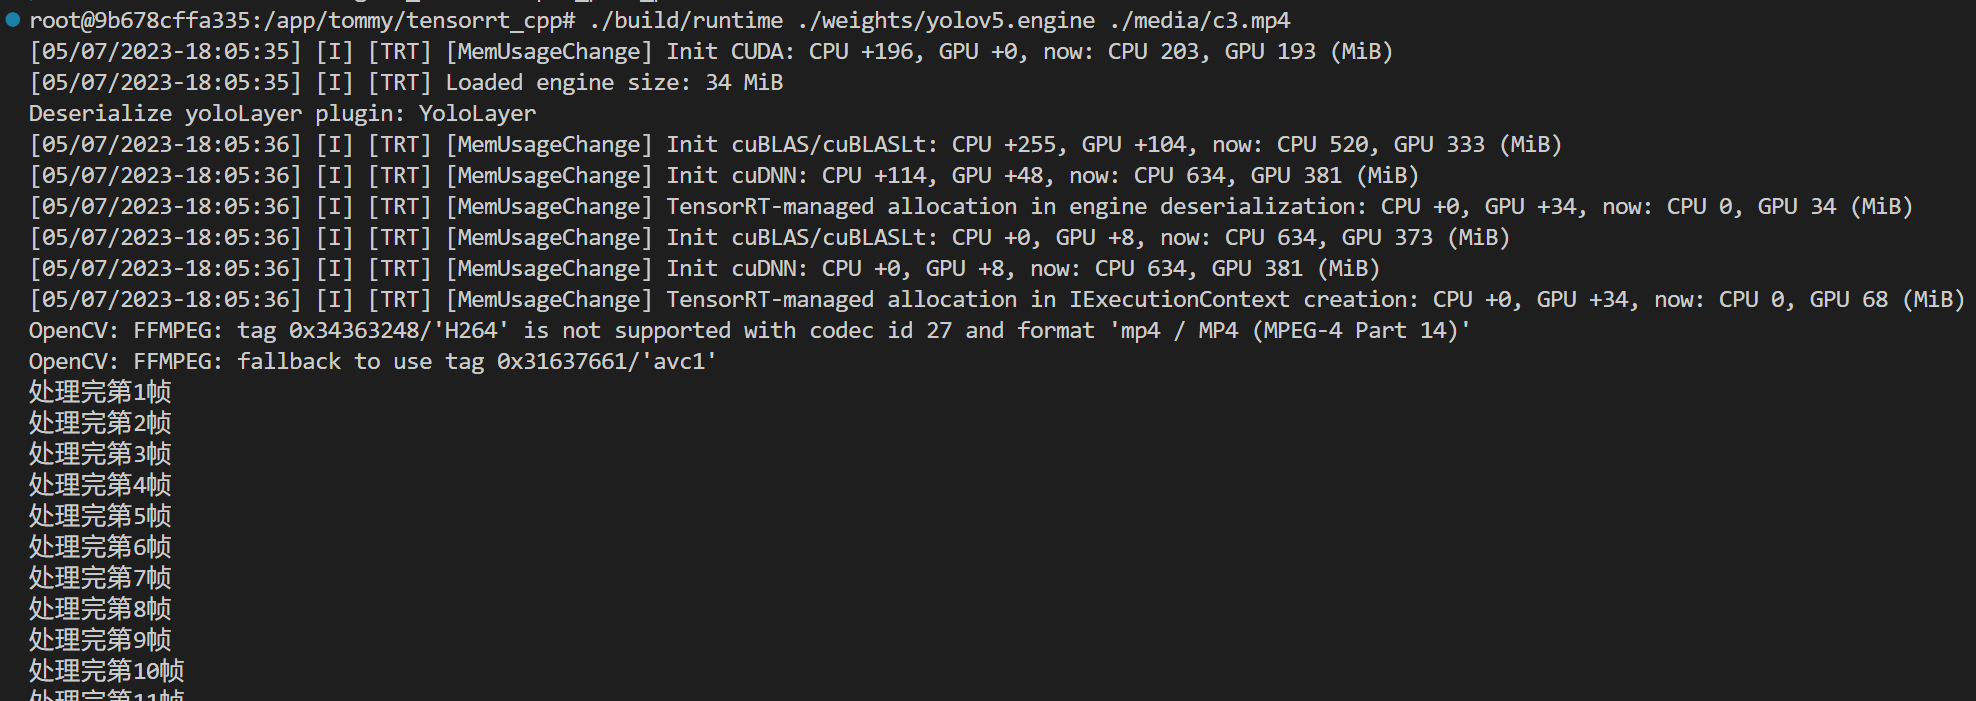

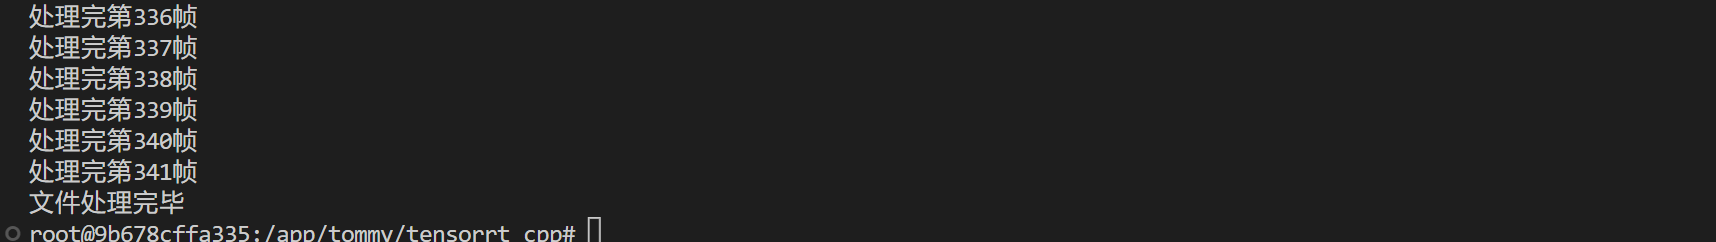

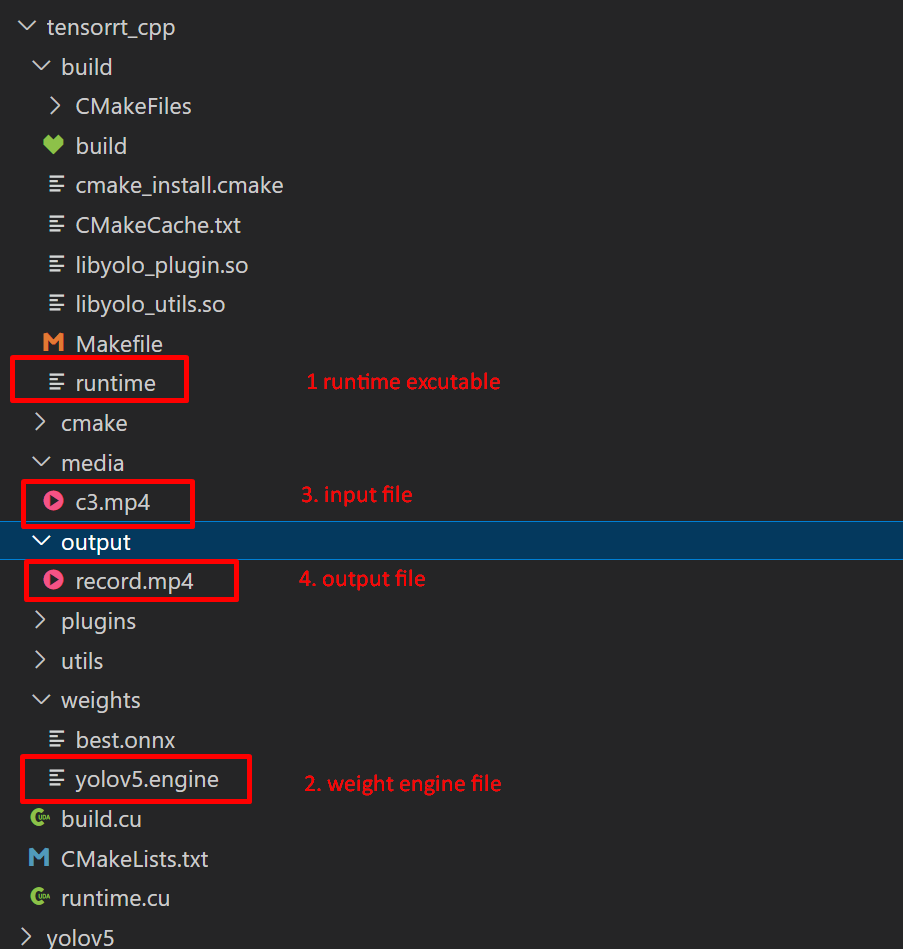